In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

import os
import numpy as np
import matplotlib.pyplot as plt

2.4.1


In [2]:
# Mount Google drive to Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset of images flower_photos.tgz, unpacking the archive into directory
# flower_photos, creating path variable PATH

#URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#zip_file = tf.keras.utils.get_file(origin=URL, 
#                                   fname="/content/drive/My Drive/Colab Notebooks/flower_photos.tgz", 
#                                   extract=True,
#                                   cache_subdir="/content/drive/My Drive/Colab Notebooks/)

#PATH = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [ ]:
# On the inside of directory flower_photos create 2 subfolders - train и test.
# Скопировать папки с названиями классов цветов в папку train.
# Внутри папки test создать папки с названиями классов цветов. В эти папки переместить по 100 изображений
# соответствующих классов из папки train

In [5]:
# if the previous step was already performed earlier
PATH = '/content/drive/My Drive/Colab Notebooks/flower_photos'

# Create paths to folders train и test
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [6]:
print(train_dir)
print(test_dir)

/content/drive/My Drive/Colab Notebooks/flower_photos/train
/content/drive/My Drive/Colab Notebooks/flower_photos/test


In [7]:
# Создаём генератор обучающих изображений, который может выполнять предварительную обработку изображений
# перед подачей их на нейронную сеть. При помощи параметра validation_split можно задать разделение
# изображений на обучающие и валидационные.

# Желательно ознакомиться с конструктором ImageDataGenerator, применить несколько вариантов обработки изображений:
# rotation_range, shear_range, rescale, horizontal_flip, vertical_flip.

datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.1)

In [8]:
# При помощи метода flow_from_directory загружаем обучающие и валидационные изображения в
# структуры даних train_generator и val_generator.
# При этом задаём размер изображений (выполняем resize), задаём размер батча (пакета).

# Желательно ознакомиться с аргументами метода flow_from_directory и реализовать сохранение валидационных
# изображений после обработки в отдельную директорию в формате jpeg (загрузка файлов в эту директорию
# будет выполняться в момент использования val_generator, например, при извлечении из него
# батчей валидационных изображений)

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
BATCH_SIZE = 119

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=314, 
    subset='validation')

Found 2856 images belonging to 5 classes.
Found 314 images belonging to 5 classes.


In [9]:
# Количество батчей, на которые разбит train датасет
train_generator.__len__()

24

In [10]:
# Количество изображений в обучающей выборке
number_of_train_images = train_generator.labels.__len__()
number_of_train_images

2856

In [11]:
# Количество батчей, на которые разбит validation датасет
val_generator.__len__()

1

In [12]:
# Создаём генератор тестовых изображений

datagen_test = ImageDataGenerator(
    rescale=1./255)

test_generator = datagen_test.flow_from_directory(
    test_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=500)

Found 500 images belonging to 5 classes.


In [13]:
# Количество батчей, на которые разбит test датасет
test_generator.__len__()

1

In [14]:
# Как видим, хотя shuffle включено данные в объекте изначально не перемешаны.
# Но они будут перемешиваться между эпохами обучения.
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [15]:
# train_generator является итератором (DirectoryIterator) и из него можно на отдельных итерациях получить
# отдельные батчи изображений и их меток

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((119, 224, 224, 3), (119, 5))

In [16]:
image_batch[1,:,:,:]

array([[[0.882353  , 0.8352942 , 0.6784314 ],
        [0.8745099 , 0.8235295 , 0.65882355],
        [0.83921576, 0.7960785 , 0.61960787],
        ...,
        [0.8000001 , 0.6862745 , 0.654902  ],
        [0.8000001 , 0.68235296, 0.6509804 ],
        [0.8000001 , 0.68235296, 0.6509804 ]],

       [[0.89019614, 0.8352942 , 0.68235296],
        [0.8705883 , 0.8196079 , 0.654902  ],
        [0.83921576, 0.79215693, 0.627451  ],
        ...,
        [0.8000001 , 0.6862745 , 0.6627451 ],
        [0.80392164, 0.6862745 , 0.6784314 ],
        [0.8000001 , 0.6862745 , 0.67058825]],

       [[0.89019614, 0.8352942 , 0.6901961 ],
        [0.8705883 , 0.8235295 , 0.6666667 ],
        [0.8313726 , 0.7960785 , 0.63529414],
        ...,
        [0.80392164, 0.6901961 , 0.6666667 ],
        [0.80392164, 0.6862745 , 0.6784314 ],
        [0.8000001 , 0.6862745 , 0.67058825]],

       ...,

       [[0.38431376, 0.27058825, 0.2901961 ],
        [0.3372549 , 0.23137257, 0.2509804 ],
        [0.34509805, 0

In [17]:
# База изображений уже разделена на классы, которым соответствуют названия папок
print (train_generator.class_indices)


{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


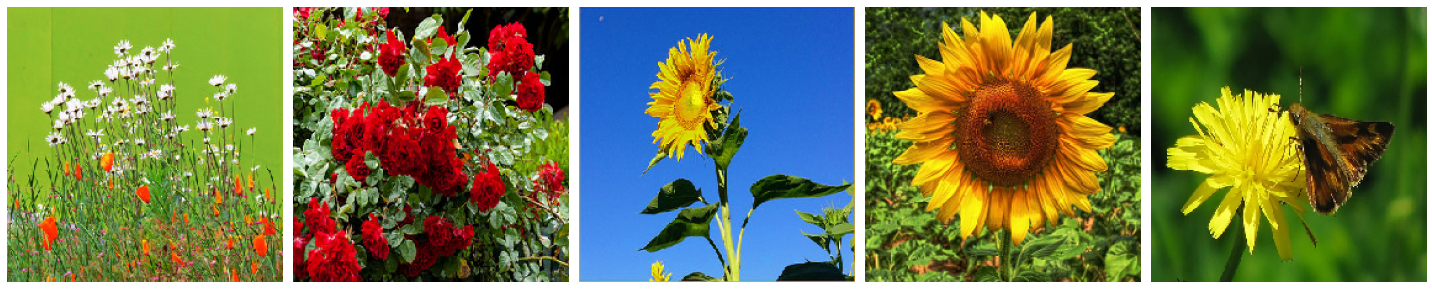

In [18]:
# Look at some validation images

validation_data, _ = next(val_generator)

sample_validation_images = validation_data[:5]

# This function will plot images in the form of a grid with 1 row and 5 columns where
# images are placed in each column.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_validation_images)

In [26]:
# Create CNN

hidden_layer_size = 4
output_size = 5

model = tf.keras.Sequential([
    
  tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 8)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 98568)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 394276    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
Total params: 394,525
Trainable params: 394,525
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
# Обучение нейронной сети.
# Нейронная сеть простейшая, даёт ужасные результаты, но здесь главное продемонстрировать возможность
# подачи структуры данных в виде генератора на вход сети

max_epochs = 1

history = model.fit(train_generator,                                      
                    epochs=max_epochs,                    
                    validation_data=val_generator)

24/24 [==============================] - 996s 41s/step - loss: 1.6165 - accuracy: 0.2285 - val_loss: 1.6073 - val_accuracy: 0.2516


In [ ]:
model.save('/home/ihor/devs/Colab Notebooks/Lab4.h5')

In [ ]:
model = tf.keras.models.load_model('/home/ihor/devs/Colab Notebooks/Lab4.h5')

In [ ]:
# Оценка эффективности нейронной сети при помощи выборки тестовых изображений

test_loss, test_accuracy = model.evaluate(test_generator)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

  ...
    to  
  ['...']
1/1 [==============================] - 13s 13s/step - loss: 1.6095 - accuracy: 0.2000

Test loss: 1.61. Test accuracy: 20.00%
